## 1. Computing the Gradients

#### Task a

Let $\frac{\partial}{\partial \theta_j} J(\theta) = \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)} ) x_j^{(i)}$ be the gradient for logistic regression. Given a learning rate $\alpha$, give the gradient descent update formula for $\theta_j$.

The general update step for the gradient descent:

$$
\begin{align*}
\Theta_j &= \Theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta) \\
&= \Theta_j - \alpha \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)} ) x_j^{(i)}
\end{align*}
$$

#### Task b

Consider the L2 loss function:

$$
L(\beta) = \frac{1}{2} \sum_{i=1}^n (y_i - \hat{y_i})^2
$$

for a binary perception classsifier with logistic activation function parameters $\beta_0, \ldots \beta_k$ and training data $\vec{x_i} \in R^k$ for $i = 1, \ldots , n$. Show that the gradient $\triangledown L = \left( \frac{\partial L}{\partial \beta_0}, \ldots , \frac{\partial L}{\partial \beta_k} \right)$ of the loss function w.r.t. parameters $\beta_j$ is:

$$
\triangledown L = \left( \sum_{i=1}^n (y_i - \hat{y_i}) y_i (1 - y_i), \ldots, \sum_{i=1}^n (y_i - \hat{y_i}) y_i (1 - y_i) x_{ik} \right)
$$

where $y_i = \sigma(f(\vec{x_i}))$ is the output of the perceptron and $\hat{y_i}$ are the class labels in the training data.

Hint: Apply the chain rule to calculate partial derivatives and use $\sigma' = \sigma(x)(1 - \sigma(x))$.

The input vector $\vec{x_i} = [1, x_{i1}, \ldots, x_{ik}]$. The weights vector: $\vec{\beta} = [b, \beta_1, \ldots, \beta_k]$. The first element of each of this vector would have index 0, so $x_{i0} = 1$, $\beta_0 = b$.

$$
\begin{align*}
f(\vec{x_i}) &= b + \beta_1 x_{i1} + \ldots + \beta_k x_{ik} = \\
&= \vec{x_i} \vec{\beta}^T \\

\frac{\partial f(\vec{x_i})}{\partial \vec{\beta_j}} &= x_{ij}
\end{align*}
$$

The $j-th$ element of the gradient is:

$$
\begin{align*}
\triangledown L_j &= \frac{\partial L(\beta)}{\partial \beta_j} = \\
&= \frac{\partial L(\beta)}{\partial \sigma} \frac{\partial \sigma}{\partial f} \frac{\partial f}{\partial \beta_j} = \\
&= \sum_{i=1}^n (y_i - \hat{y_i}) y_i (1 - y_i) \vec{x}_{ij}
\end{align*}
$$

#### Task c

Consider a univariative regression $\hat{y} = wx$ where $w \in R$ and $x \in R^{1 \times m}$. The cost function is the squared-error cost $J = \frac{1}{m} || \hat{y} - y||^2$. Find $\frac{\partial J}{\partial w}$ by performing a step-by-step procedure.

So, this function is done in the vector way, that $x_i \in R$ is the only one feature for measurement i and $x \in R^m$ is a feature matrix. So, $\hat{y} \in R^m$ and $y \in R^m$. That is why we use a vector norm in the loss function.

$$
\begin{align*}
\frac{\partial J}{\partial w} &= \frac{\partial J}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial w} = \\
&= \frac{2}{m} \vec{(\hat{y} - y)} \vec{x}^T
\end{align*}
$$

## 2. Activation functions and Neural Networks

#### Task a

Implement the following functions that take a matrix as an input:
- Softmax
- Sigmoid
- ReLu
- Tahn

Hint: use numpy package function np.sum, np.exp, np.max

In [25]:
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.datasets import make_moons
from sklearn.metrics import roc_auc_score
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from torch.nn import Sequential, Linear, Tanh, Sigmoid, BCELoss
from torch.optim import Adam

In [2]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [4]:
def relu(x):
    return(np.maximum(0, x))

In [5]:
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

#### Task b

Use the two moons dataset. Split the dataset to 80% train data and 20% test data. Implement the following models:
- Logistic Regression using the default parameters from sklearn
- Neural Network using Pytorch:
    - Create 2 hidden layers where the output dimension of the first layer is 6
    - Use the activation function torch.tanh after the first layer and torch.sigmoid after the second layer
    - Use BCELoss as a loss function
    - Use SGD as an optimisation function, with learning rate 0.0001
- Same Neural Network model as above but change learning rate to 0.04

Calculate the accuracy score of all the models for the test set. Explain the role of learning rate in neural networks and explain the difference in accuracy scores between the two Neural Network models. Plot the decision boundary using the Neural Network with learning rate 0.04 for the test set.

In [6]:
x, y = make_moons(n_samples=1000, random_state=42, noise=0.1)

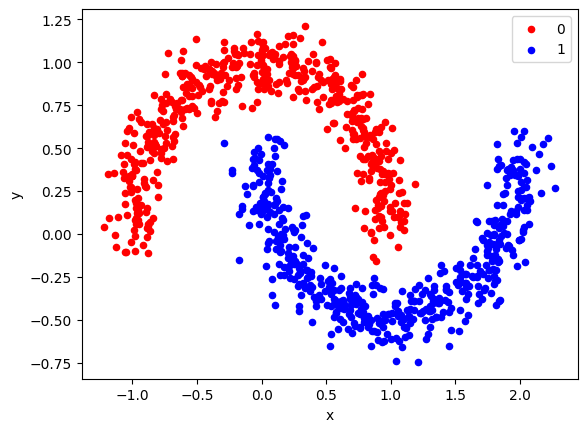

In [7]:
df = pd.DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

In [9]:
regresssion = LogisticRegression(random_state=42, max_iter=1000, solver='lbfgs')
regresssion.fit(x_train, y_train)
roc_auc_score(y_test, regresssion.predict_proba(x_test)[:,1])

np.float64(0.9621)

In [10]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [11]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [12]:
train_tensor = torch.tensor(x_train, dtype=torch.float32).to(device)
test_tensor = torch.tensor(x_test, dtype=torch.float32).to(device)
train_labels = torch.tensor(y_train, dtype=torch.float32).to(device)
test_labels = torch.tensor(y_test, dtype=torch.float32).to(device)

In [14]:
class NN:
    def __init__(self, features, device, lr=0.01):
        self.model = Sequential(
            Linear(features, 6),
            Tanh(),
            Linear(6, 1),
            Sigmoid()
        ).to(device)
        self.loss_function = BCELoss()
        self.optimizer = Adam(self.model.parameters(), lr=lr)


    def train(self, x, y):
        for _ in tqdm(range(500)):
            self.model.train()
            self.optimizer.zero_grad()
            y_pred = self.model(x)
            loss = self.loss_function(y_pred.squeeze(), y)
            loss.backward()
            self.optimizer.step()

    def test(self, x, y):
        self.model.eval()
        with torch.no_grad():
            y_pred = self.model(x)
            return roc_auc_score(y.cpu().detach().numpy(), y_pred.cpu().detach().numpy())

    def predict(self, x):
        self.model.eval()
        with torch.no_grad():
            y_pred = self.model(x)
            result = torch.where(y_pred > 0.5, 1, 0)
            return result.cpu().detach().numpy()

In [15]:
model1 = NN(train_tensor.shape[1], device, lr=0.0001)
model1.train(train_tensor, train_labels)
model1.test(test_tensor, test_labels)

100%|██████████| 500/500 [00:00<00:00, 907.06it/s] 


np.float64(0.8415)

In [16]:
model2 = NN(train_tensor.shape[1], device, lr=0.04)
model2.train(train_tensor, train_labels)
model2.test(test_tensor, test_labels)

100%|██████████| 500/500 [00:00<00:00, 1154.85it/s]


np.float64(1.0)

So the Logistic regression classifier has better score than first model but worser than second one. 

The leaarning rate is the hyperparam which defines how fast the network learns. Two models were learning same number of epochs and the model with higher learning rate achieved the optimum solution faster. But at the same time the pure SGD solver is highly dependent of the choice of learning rate and it can jump over the optimum solution is the learning rate is too big or do not achieve it if the learning rate is too small.

#### Plot decision boundary:

In [17]:
x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

In [24]:
whole_space = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32).to(device)
z = model2.predict(whole_space).reshape(xx.shape)

In [28]:
fig = go.Figure()
fig.add_trace(go.Contour(
    x=np.arange(x_min, x_max, 0.01),
    y=np.arange(y_min, y_max, 0.01),
    z=z,
    showscale=False,
    colorscale='RdBu',
    opacity=0.6,
    contours=dict(
        start=0,
        end=1,
        size=1,
    )
))
fig.add_trace(go.Scatter(
    x=x_test[:, 0],
    y=x_test[:, 1],
    mode='markers',
    marker=dict(
        color=y_test,
        colorscale='RdBu',
        line=dict(width=1)
    ),
    name='Test Data'
))
fig.update_layout(
    title='2 moons decision boundary',
    xaxis_title='x1',
    yaxis_title='x2'
)
fig.show()